In [2]:
# Step 1: Data Cleaning and Preparation

import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving HR_Employee_Attrition.csv to HR_Employee_Attrition.csv


In [4]:
df = pd.read_csv("HR_Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours',
         'DailyRate', 'HourlyRate', 'MonthlyRate'], axis=1, inplace=True)

In [7]:
df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True)
df.columns = df.columns.str.lower().str.strip()

In [8]:
df.isnull().sum()

,0
age,0
attrition,0
business_travel,0
department,0
distance_from_home,0
education,0
education_field,0
environment_satisfaction,0
gender,0
job_involvement,0


In [9]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1470 non-null   int64 
 1   attrition                   1470 non-null   object
 2   business_travel             1470 non-null   object
 3   department                  1470 non-null   object
 4   distance_from_home          1470 non-null   int64 
 5   education                   1470 non-null   int64 
 6   education_field             1470 non-null   object
 7   environment_satisfaction    1470 non-null   int64 
 8   gender                      1470 non-null   object
 9   job_involvement             1470 non-null   int64 
 10  job_level                   1470 non-null   int64 
 11  job_role                    1470 non-null   object
 12  job_satisfaction            1470 non-null   int64 
 13  marital_status              1470 non-null   obje

In [10]:
df.to_csv("cleaned_hr_data.csv", index=False)
files.download("cleaned_hr_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# Step 2: Exploratory Data Analysis (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
sns.set(style="whitegrid")

/tmp/ipython-input-14-2232864998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='attrition', palette='Set2')


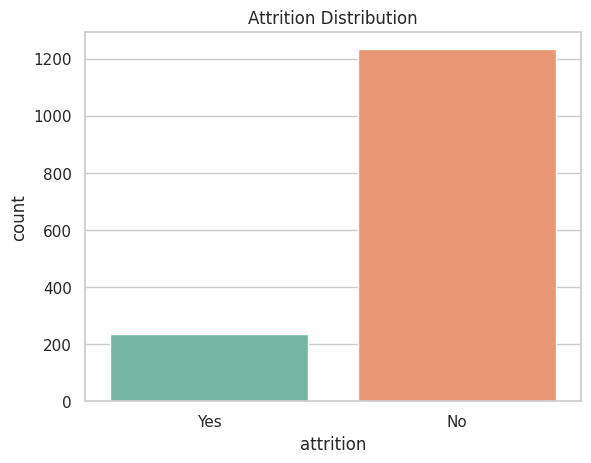

In [14]:
sns.countplot(data=df, x='attrition', palette='Set2')
plt.title("Attrition Distribution")
plt.show()

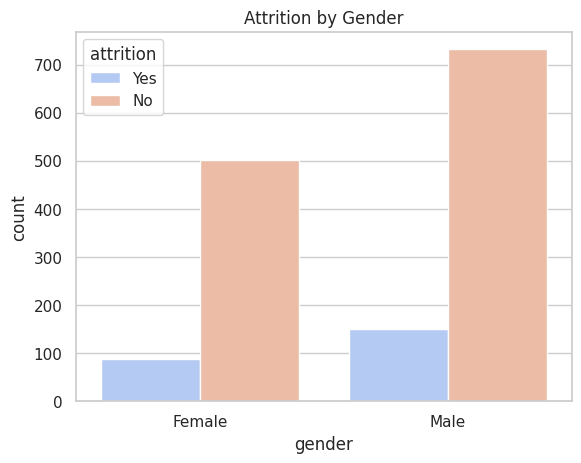

In [15]:
sns.countplot(data=df, x='gender', hue='attrition', palette='coolwarm')
plt.title("Attrition by Gender")
plt.show()

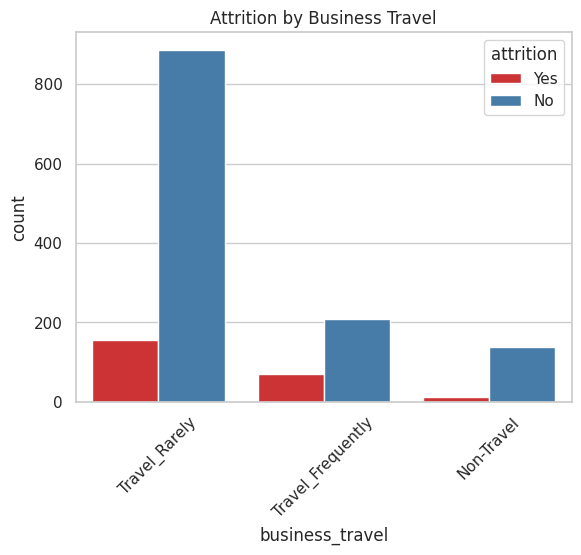

In [16]:
sns.countplot(data=df, x='business_travel', hue='attrition', palette='Set1')
plt.title("Attrition by Business Travel")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-17-3897102201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='monthly_income', palette='pastel')


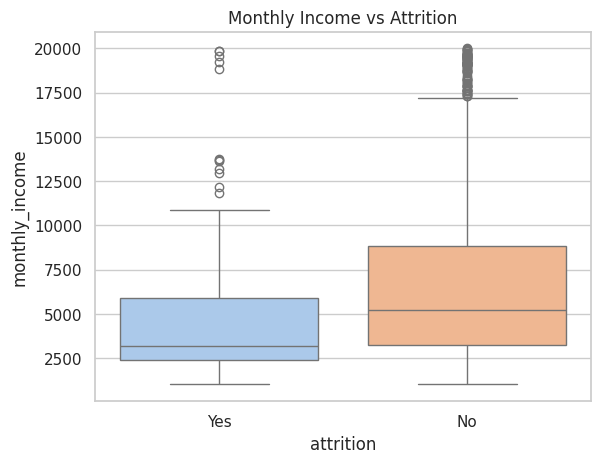

In [17]:
sns.boxplot(data=df, x='attrition', y='monthly_income', palette='pastel')
plt.title("Monthly Income vs Attrition")
plt.show()

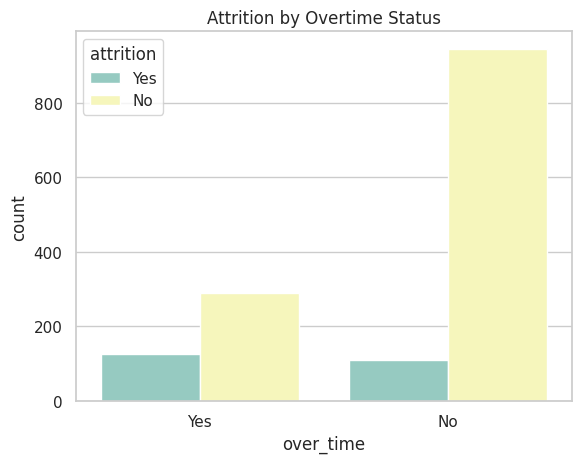

In [18]:
sns.countplot(data=df, x='over_time', hue='attrition', palette='Set3')
plt.title("Attrition by Overtime Status")
plt.show()

/tmp/ipython-input-19-1362896814.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='attrition', y='years_at_company', palette='Accent')


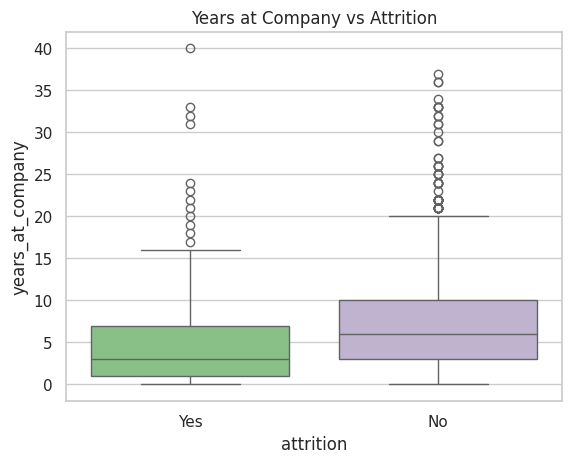

In [19]:
sns.boxplot(data=df, x='attrition', y='years_at_company', palette='Accent')
plt.title("Years at Company vs Attrition")
plt.show()

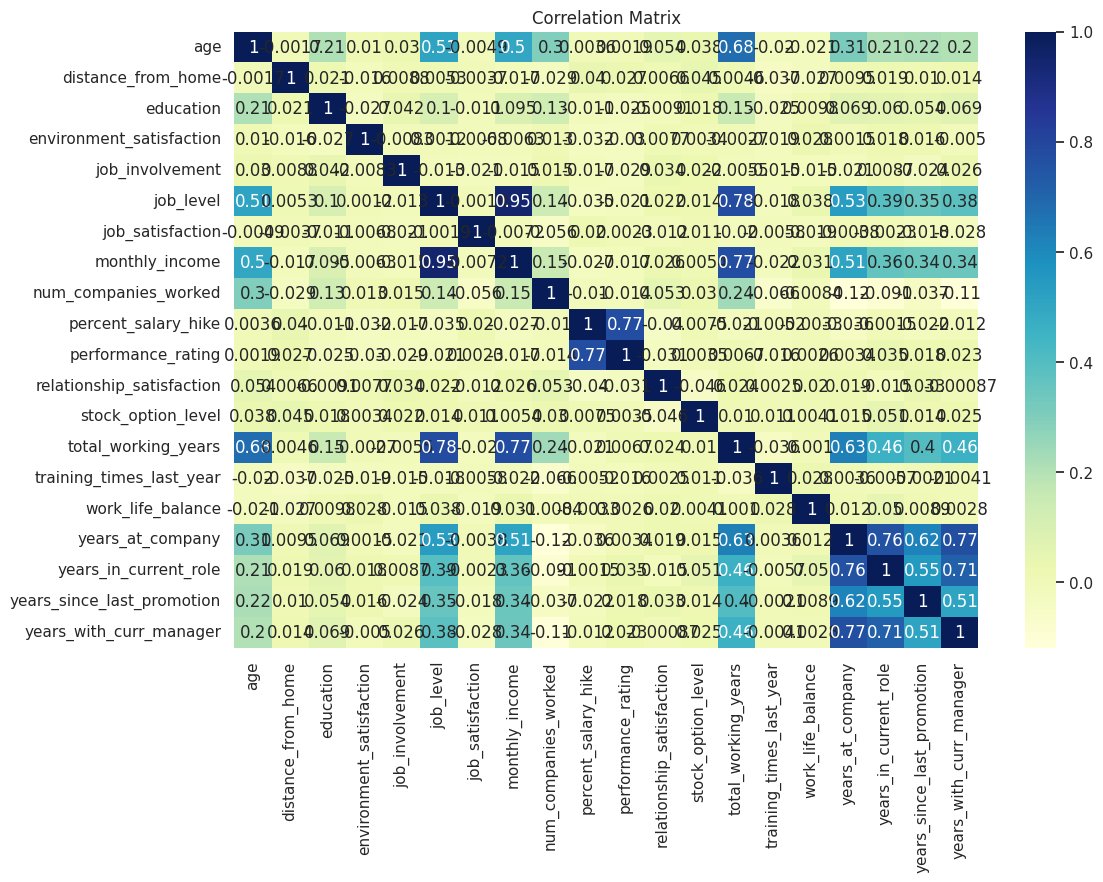

In [24]:
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include='number')

sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')

plt.title("Correlation Matrix")
plt.show()

In [25]:
# Step 3: Feature Engineering and Model Building Plan
# Step 3.1: Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

# make a copy to avoid messing with original data
df_model = df.copy()

# encode target column
df_model['attrition'] = df_model['attrition'].map({'Yes': 1, 'No': 0})

# identify all categorical columns
cat_cols = df_model.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", cat_cols)

# apply label encoding to all
le = LabelEncoder()
for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])




Categorical columns: ['business_travel', 'department', 'education_field', 'gender', 'job_role', 'marital_status', 'over_time']


In [26]:
# Step 3.2: Split Data for Training
from sklearn.model_selection import train_test_split

# Feature columns (x) and target column (y)
x = df_model.drop('attrition', axis=1)
y = df_model['attrition']

# Split the data 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Check shape of data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (1176, 27)
Testing data shape: (294, 27)


In [27]:
# Step 3.3: Train a Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", round(acc * 100, 2), "%")

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 88.1 %

Confusion Matrix:
 [[249   6]
 [ 29  10]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       255
           1       0.62      0.26      0.36        39

    accuracy                           0.88       294
   macro avg       0.76      0.62      0.65       294
weighted avg       0.86      0.88      0.86       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


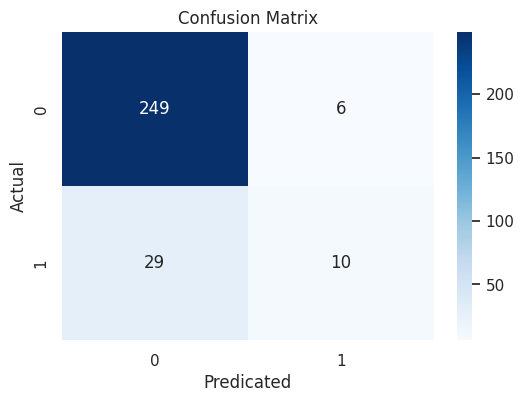

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
# SHAP

!pip install shap

In [31]:
import shap

# Initialize JS visualizer
shap.initjs()

# Create explainer object based on your trained model
explainer = shap.Explainer(model, x_train)

# Calculate SHAP values
shap_values = explainer(x_test)

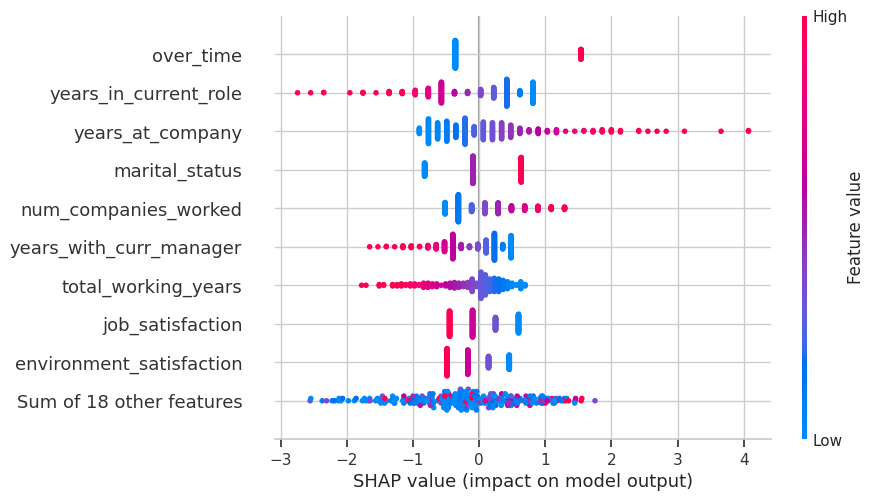

In [32]:
shap.plots.beeswarm(shap_values)

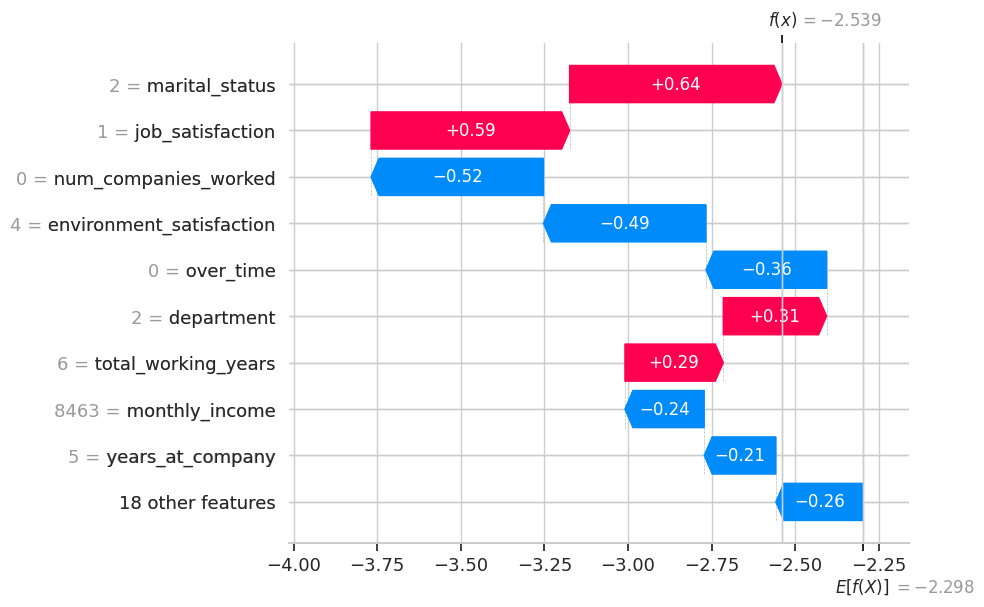

In [33]:
shap.plots.waterfall(shap_values[0])

In [34]:
# Save final model - ready data
df_model.to_csv("final_hr_attrition_data.csv", index=False)

In [35]:
from google.colab import files
files.download("final_hr_attrition_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>